<a href="https://colab.research.google.com/github/Suspinto/projectdatasc-19/blob/main/Project_Group19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Project Plan
 
#1. Upload csv files on Colab Folder
 
#2. Merge all csv per "bundesland" into one file
 
#3. Load other file and filter for German cases and deaths -> Save on another object
 
#=> 2 Objects/Dataframes
 
# During all steps -> Update project roadmap

# Diagram for visualization: Bar diagram for cases, free hospital beds, ventialed, deaths 
# -> Last 7-day trend (Mo,Tue,...,Su)
# -> Every month (Jan,...,Sep)
#1 states= cases/deaths by month



In [ ]:
# Imports
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read hospitals file for all bundesländer
nrw = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/NRW.csv")
nrw.insert(0,"Bundesland","Nordrhein-Westfalen")
bw = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/badenWuerttemberg.csv")
bw.insert(0,"Bundesland","Baden-Würtemberg")
bayern = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/bayern.csv")
bayern.insert(0,"Bundesland","Bayern")
berlin = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/berlin.csv")
berlin.insert(0,"Bundesland","Berlin")
brandenburg = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/brandenburg.csv")
brandenburg.insert(0,"Bundesland","Brandenburg")
bremen = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/bremen.csv")
bremen.insert(0,"Bundesland","Bremen")
hamburg = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/hamburg.csv")
hamburg.insert(0,"Bundesland","Hamburg")
hessen = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/hessen.csv")
hessen.insert(0,"Bundesland","Hessen")
mvp = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/meckpom.csv")
mvp.insert(0,"Bundesland","Mecklenburg-Vorpommern")
ns = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/niedersachsen.csv")
ns.insert(0,"Bundesland","Niedersachsen")
rp = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/rheinlandPfalz.csv")
rp.insert(0,"Bundesland","Rheinland Pfalz")
saarland = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/saarland.csv")
saarland.insert(0,"Bundesland","Saarland")
sachsen = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/sachsen.csv")
sachsen.insert(0,"Bundesland","Sachsen")
sachsenanhalt = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/sachsenAnhalt.csv")
sachsenanhalt.insert(0,"Bundesland","Sachsen-Anhalt")
sh = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/schleswigHolstein.csv")
sh.insert(0,"Bundesland","Schleswig-Holstein")
thueringen = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/thueringen.csv")
thueringen.insert(0,"Bundesland","Thüringen")

# Merge into one dataframe "hospitalsmerged"
hospitalsMerged =pd.concat([nrw,bw,bayern,berlin,brandenburg,bremen,hamburg,hessen,mvp,ns,rp,saarland,sachsen,sachsenanhalt,sh,thueringen])


# Change "meldedatum" from object to datetime
hospitalsMerged.dtypes
for i in range(len(hospitalsMerged)) :
  date = str(hospitalsMerged.iloc[i, 1]).split("T")
  hospitalsMerged.iloc[i, 1]= date[0]

hospitalsMerged["date"]= pd.to_datetime(hospitalsMerged["date"],format='%Y-%m-%d')

################################################################################################################################################

# Read corona cases and deaths for all German "kreise"
casesAndDeaths = pd.read_csv("/content/drive/My Drive/TechlabsProjectGroup19/RKI_COVID19.csv")
#Drop redundant columns
cols = [0,1,3,9,10,13,14,15,16,17]
casesAndDeaths=casesAndDeaths.drop(casesAndDeaths.columns[cols], axis=1)
casesAndDeaths.head(50)

# Change "meldedatum" from object to datetime
casesAndDeaths.dtypes
casesAndDeaths["Meldedatum"]= pd.to_datetime(casesAndDeaths["Meldedatum"],format='%Y/%m/%d %H:%M:%S')
casesAndDeaths.dtypes

#sort cases death and sex by bundesland and date 
casesAndDeaths.sort_values(by=['Bundesland', 'Meldedatum'], inplace=True)
casesAndDeaths.head(50)

# Get cases and deaths for each bundesland on each day
bundeslaender = ["Schleswig-Holstein","Hamburg","Niedersachsen","Bremen","Nordrhein-Westfalen","Hessen","Rheinland-Pfalz","Baden-Württemberg","Bayern","Saarland","Berlin","Brandenburg","Mecklenburg-Vorpommern","Sachsen","Sachsen-Anhalt","Thüringen"]
yearindex = pd.date_range(start="2020-01-01",end="2020-12-31",freq='D')
merged = pd.DataFrame(index=yearindex)
for bundesland in bundeslaender:
  casesAndDeathsBundesland = casesAndDeaths[casesAndDeaths['Bundesland']== bundesland]
  redundantcolumns = [1,6,7]
  casesAndDeathsBundesland = casesAndDeathsBundesland.drop(casesAndDeathsBundesland.columns[redundantcolumns], axis=1)
  casesAndDeathsBundesland=casesAndDeathsBundesland[['Bundesland','AnzahlFall', 'AnzahlTodesfall', 'Meldedatum']].groupby('Meldedatum').sum()
  casesAndDeathsBundesland.insert(0,bundesland,bundesland)


# Get free and available beds + emergency reserve and deaths for each bundesland on each day

  holder = hospitalsMerged[hospitalsMerged['Bundesland']== bundesland]
  holder = holder.set_index("date")
  holder = holder.drop(columns=["Bundesland"])

# Merge cases, deaths, available and free beds + emergency capacity 
  casesAndDeathsBundesland = pd.concat([casesAndDeathsBundesland,holder],axis=1)


  if (len(merged)==0):
    merged = casesAndDeathsBundesland
  else:
    merged = pd.concat([merged,casesAndDeathsBundesland],axis=1)

#Fill empty cells with 0/name of bundesland
for column in merged.columns:
  if (column == "AnzahlFall" or column=="AnzahlTodesfall") :
      merged[column] = merged[column].replace(r'\s+', np.nan, regex=True)
      merged[column] = merged[column].fillna(0)
  elif (column in bundeslaender):
      merged[column]= column

#Select relevant dates
today = "22.10.2020"
merged = merged.loc["20.03.2020  00:00:00":today]
merged.to_excel("merged.xlsx")

In [ ]:
# Help functions to select data for diagrams

cases = 1
deaths = 2
freeBeds = 3
occBeds = 4
reserved = 5
bundeslaender = ["Schleswig-Holstein","Hamburg","Niedersachsen","Bremen","Nordrhein-Westfalen","Hessen","Rheinland-Pfalz","Baden-Württemberg","Bayern","Saarland","Berlin","Brandenburg","Mecklenburg-Vorpommern","Sachsen","Sachsen-Anhalt","Thüringen"]

# Cases and deaths overall between 20.03.2020 and today (22.10.2020)

def sumCalcOverall(statistic): # where statistic is either cases, deaths, freeBeds, occBeds or reserved 
  sum = 0
  for bundesland in bundeslaender:
    ind = merged.columns.get_loc(bundesland)
    loc = ind + statistic
    sum = sum + merged.iloc[:,loc].sum()
  return sum

casesGermany = sumCalcOverall(cases)
deathsGermany = sumCalcOverall(deaths)

# Cases and deaths overall for a certain date
def sumCalcOverallDate(statistic, startdate, enddate): # where statistic is either cases, deaths, freeBeds, occBeds or reserved 
  sum = 0
  selection = merged.loc[startdate:enddate]
  selection.to_excel("selection.xlsx")
  for bundesland in bundeslaender:
    ind = selection.columns.get_loc(bundesland)
    loc = ind + statistic
    sum = sum + selection.iloc[:,loc].sum()
  return sum


# Cases and deaths per bundesland between 20.03.2020 and today (22.10.2020)

def sumCalcBL(bundesland,statistic): # where statistic is either cases, deaths, freeBeds, occBeds or reserved ; bundesland is either "Schleswig-Holstein","Hamburg","Niedersachsen","Bremen","Nordrhein-Westfalen","Hessen","Rheinland-Pfalz","Baden-Württemberg","Bayern","Saarland","Berlin","Brandenburg","Mecklenburg-Vorpommern","Sachsen","Sachsen-Anhalt","Thüringen"
  ind = merged.columns.get_loc(bundesland)
  loc = ind + statistic
  return merged.iloc[:,loc].sum()
 
casesSchleswig = sumCalcBL(bundeslaender[0],cases)
deathsSchleswig = sumCalcBL(bundeslaender[0],deaths)
casesHamburg = sumCalcBL(bundeslaender[1],cases)
deathsHamburg = sumCalcBL(bundeslaender[1],deaths)
casesNiedersachsen = sumCalcBL(bundeslaender[2],cases)
deathsNiedersachsen = sumCalcBL(bundeslaender[2],deaths)
casesBremen = sumCalcBL(bundeslaender[3],cases)
deathsBremen =sumCalcBL(bundeslaender[3],deaths)
casesNordrhein = sumCalcBL(bundeslaender[4],cases)
deathsNordrhein =sumCalcBL(bundeslaender[4],deaths)
casesHessen = sumCalcBL(bundeslaender[5],cases)
deathsHessen = sumCalcBL(bundeslaender[5],deaths)
casesRheinland = sumCalcBL(bundeslaender[6],cases)
deathsRheinland = sumCalcBL(bundeslaender[6],deaths)
casesBaden = sumCalcBL(bundeslaender[7],cases)
deathsBaden = sumCalcBL(bundeslaender[7],deaths)
casesBayern = sumCalcBL(bundeslaender[8],cases)
deathsBayern = sumCalcBL(bundeslaender[8],deaths)
casesSaarland = sumCalcBL(bundeslaender[9],cases)
deathsSaarland = sumCalcBL(bundeslaender[9],deaths)
casesBerlin = sumCalcBL(bundeslaender[10],cases)
deathsBerlin = sumCalcBL(bundeslaender[10],deaths)
casesBrandenburg = sumCalcBL(bundeslaender[11],cases)
deathsBrandenburg = sumCalcBL(bundeslaender[11],deaths)
casesMecklenburg = sumCalcBL(bundeslaender[12],cases)
deathsMecklenburg = sumCalcBL(bundeslaender[12],deaths)
casesSachsen = sumCalcBL(bundeslaender[13],cases)
deathsSachsen = sumCalcBL(bundeslaender[13],deaths)
casesAnhalt = sumCalcBL(bundeslaender[14],cases)
deathsAnhalt = sumCalcBL(bundeslaender[14],deaths)
casesThüringen = sumCalcBL(bundeslaender[15],cases)
deathsThüringen = sumCalcBL(bundeslaender[15],deaths)

# Select all cases and deaths in Germany based on a certain day
def sumCalcDate(date, statistic): # where statistic is either cases, deaths, freeBeds, occBeds or reserved ; date format Y-M-D
  sum = 0
  selection = merged.loc[date:date]
  for bundesland in bundeslaender:
    ind = selection.columns.get_loc(bundesland)
    loc = ind + statistic
    sum = sum + selection.iloc[:,loc].sum()
  return sum

print (sumCalcDate("20.10.2020",deaths))

# Select all cases and deaths per bundesland based on a certain day
def sumCalcBundeslandDate(date,bundesland,statistic): # where statistic is either cases, deaths, freeBeds, occBeds or reserved ; date format Y-M-D
  sum = 0
  selection = merged.loc[date:date]
  ind = selection.columns.get_loc(bundesland)
  loc = ind + statistic
  return selection.iloc[:,loc].sum()

print (sumCalcBundeslandDate("19.10.2020","Schleswig-Holstein",deaths))


##################################################################
#Get last seven days in array tage
def calcLastSevenDays(year,month,day):
  today = datetime.datetime(year,month,day)
  lastweek = today - timedelta(days=7)

  days = ["day1","day2","day3","day4","day5","day6","day7"]
  tage = []
  i=0
  for day in days:
    day = today - timedelta(days=i)
    i =i+1
    tage.append(day)
  return tage
################################################################################################################################################
# Get statistics for each day on a certain daterange
def sumCalcDateRange(year,month,day,statistic): # where statistic is either cases, deaths, freeBeds, occBeds or reserved ; date format Y-M-D
  statisticPerDay =[]
  datelist = calcLastSevenDays(year,month,day)
  print(datelist)
  for day in datelist:
    sum = 0
    selection = merged.loc[day:day]
    for bundesland in bundeslaender:
      ind = selection.columns.get_loc(bundesland)
      loc = ind + statistic
      sum = sum + selection.iloc[:,loc].sum()
    statisticPerDay.append(sum)
  return statisticPerDay

def sumCalcDateRangeBL(year,month,day,statistic,BL): # where statistic is either cases, deaths, freeBeds, occBeds or reserved ; date format Y-M-D
  statisticPerDay =[]
  datelist = calcLastSevenDays(year,month,day)
  print(datelist)
  for day in datelist:
    sum = 0
    selection = merged.loc[day:day]
    for bundesland in bundeslaender:
      if (bundesland == BL):
        ind = selection.columns.get_loc(bundesland)
        loc = ind + statistic
        sum = sum + selection.iloc[:,loc].sum()
        statisticPerDay.append(sum)
  return statisticPerDay

print(sumCalcDateRangeBL(2020,10,20,cases,"Nordrhein-Westfalen"))



9.0
1.0
[datetime.datetime(2020, 10, 20, 0, 0), datetime.datetime(2020, 10, 19, 0, 0), datetime.datetime(2020, 10, 18, 0, 0), datetime.datetime(2020, 10, 17, 0, 0), datetime.datetime(2020, 10, 16, 0, 0), datetime.datetime(2020, 10, 15, 0, 0), datetime.datetime(2020, 10, 14, 0, 0)]
[2190.0, 1521.0, 1177.0, 1609.0, 2026.0, 2067.0, 1955.0]


0.02519250804891232


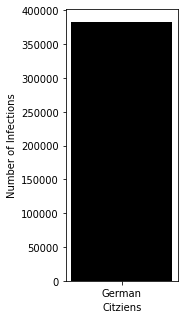

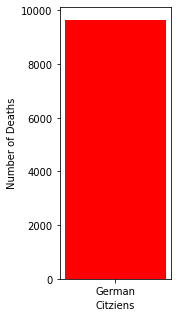

Death rate: 2.52%
0.020027055018917377


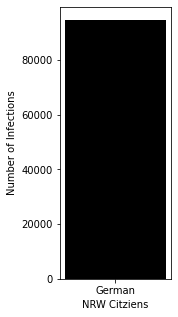

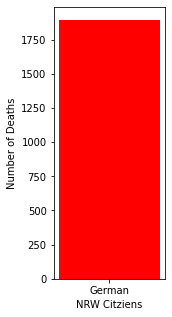

Death rate: 2.0%
[datetime.datetime(2020, 10, 21, 0, 0), datetime.datetime(2020, 10, 20, 0, 0), datetime.datetime(2020, 10, 19, 0, 0), datetime.datetime(2020, 10, 18, 0, 0), datetime.datetime(2020, 10, 17, 0, 0), datetime.datetime(2020, 10, 16, 0, 0), datetime.datetime(2020, 10, 15, 0, 0)]
[11253.0, 9135.0, 6306.0, 3663.0, 5647.0, 7888.0, 7850.0]


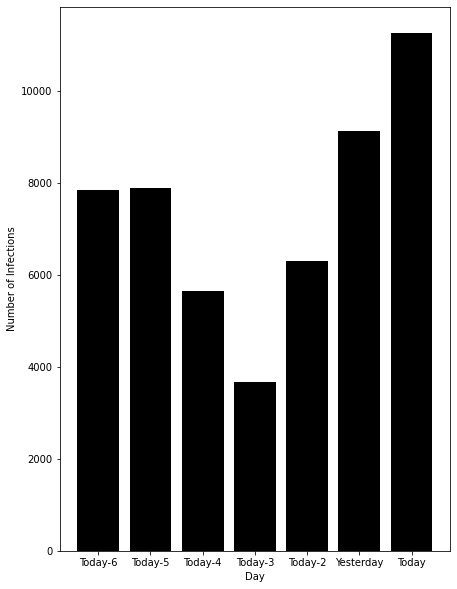

[datetime.datetime(2020, 10, 21, 0, 0), datetime.datetime(2020, 10, 20, 0, 0), datetime.datetime(2020, 10, 19, 0, 0), datetime.datetime(2020, 10, 18, 0, 0), datetime.datetime(2020, 10, 17, 0, 0), datetime.datetime(2020, 10, 16, 0, 0), datetime.datetime(2020, 10, 15, 0, 0)]
[7.0, 9.0, 10.0, 3.0, 3.0, 15.0, 18.0]
Last Seven funktioniert
[18.0, 15.0, 3.0, 3.0, 10.0, 9.0, 7.0]


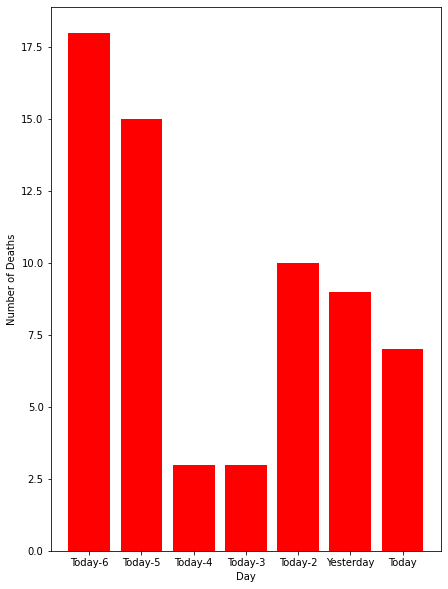

[datetime.datetime(2020, 10, 20, 0, 0), datetime.datetime(2020, 10, 19, 0, 0), datetime.datetime(2020, 10, 18, 0, 0), datetime.datetime(2020, 10, 17, 0, 0), datetime.datetime(2020, 10, 16, 0, 0), datetime.datetime(2020, 10, 15, 0, 0), datetime.datetime(2020, 10, 14, 0, 0)]
Last Seven funktioniert nicht
[2190.0, 1521.0, 1177.0, 1609.0, 2026.0, 2067.0, 1955.0]


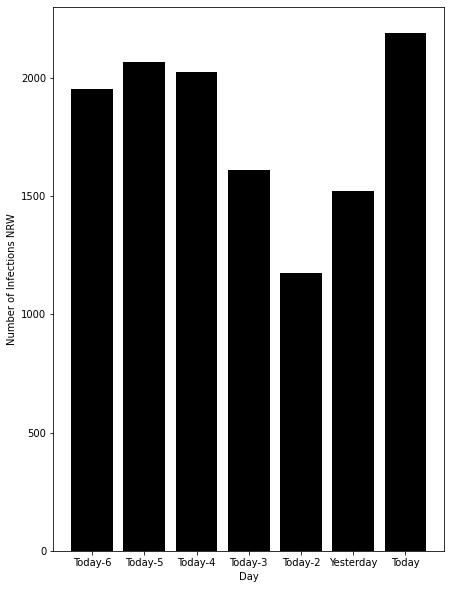

[datetime.datetime(2020, 10, 20, 0, 0), datetime.datetime(2020, 10, 19, 0, 0), datetime.datetime(2020, 10, 18, 0, 0), datetime.datetime(2020, 10, 17, 0, 0), datetime.datetime(2020, 10, 16, 0, 0), datetime.datetime(2020, 10, 15, 0, 0), datetime.datetime(2020, 10, 14, 0, 0)]
[3.0, 4.0, 1.0, 1.0, 3.0, 6.0, 4.0]


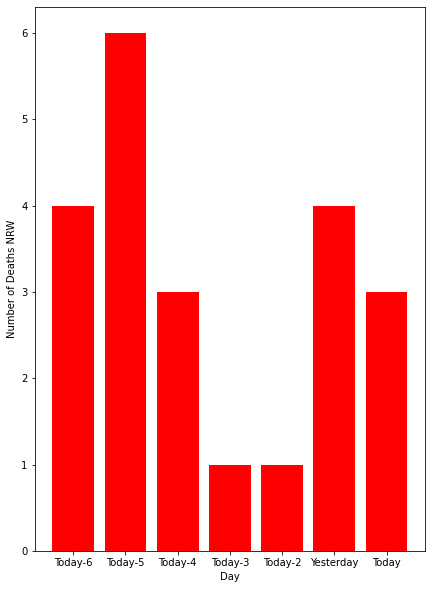

In [ ]:
#Diagrams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
##################################################################################################################################
#Cases, Deaths, Deathrate for entire Germany

casesGermany = sumCalcOverallDate(cases,"2020-03-20","2020-10-22")
deathsGermany = sumCalcOverallDate(deaths,"2020-03-20","2020-10-22")
print(deathsGermany/casesGermany)

barlabel = "German"
value = casesGermany

fig = plt.figure(figsize=(2,5))

plt.bar (barlabel, value, color="black")
plt.ylabel("Number of Infections")
plt.xlabel("Citziens")

plt.show()

barlabel = "German"
value = deathsGermany

fig = plt.figure(figsize=(2,5))

plt.bar (barlabel, value, color="red")
plt.ylabel("Number of Deaths")
plt.xlabel("Citziens")

plt.show()

deathrate = deathsGermany/casesGermany*100
print("Death rate: "+str(round(deathrate,2))+"%")
##########################################################################################################################################
#Cases, Deaths, Deathrate for Bundesland Nordrhein-Westphalia

casesNRW = sumCalcBL(bundeslaender[4],cases)
deathsNRW = sumCalcBL(bundeslaender[4],deaths)
print(deathsNRW/casesNRW)

barlabel = "German"
value = casesNRW

fig = plt.figure(figsize=(2,5))

plt.bar (barlabel, value, color="black")
plt.ylabel("Number of Infections")
plt.xlabel("NRW Citziens")

plt.show()

barlabel = "German"
value = deathsNRW

fig = plt.figure(figsize=(2,5))

plt.bar (barlabel, value, color="red")
plt.ylabel("Number of Deaths")
plt.xlabel("NRW Citziens")

plt.show()

deathrate = deathsNRW/casesNRW*100
print("Death rate: "+str(round(deathrate,2))+"%")

##################################################################################
#7 day diagram for cases in entire Germany
lastSevenDays = sumCalcDateRange(2020,10,21,cases)
print(lastSevenDays)
barlabel = ["A","A","A","A","A","A","A",]
lastSevenDays= lastSevenDays[::-1]#here 
value = lastSevenDays

fig = plt.figure(figsize=(7,10))

plt.bar (["Today-6","Today-5","Today-4","Today-3","Today-2","Yesterday","Today"], height = value, color="black")
plt.ylabel("Number of Infections")
plt.xlabel("Day")

plt.show()
#######################################################################################
#7 day diagram for deaths in entire Germany
lastSevenDays = sumCalcDateRange(2020,10,21,deaths)
print(lastSevenDays)
barlabel = ["A","A","A","A","A","A","A",]
lastSevenDays= lastSevenDays[::-1]
print("Last Seven funktioniert")
print(lastSevenDays)
value = lastSevenDays

fig = plt.figure(figsize=(7,10))

plt.bar (["Today-6","Today-5","Today-4","Today-3","Today-2","Yesterday","Today"], height = value, color="red")
plt.ylabel("Number of Deaths")
plt.xlabel("Day")

plt.show()

#########################################
# One Examplary Bundesland
#7 day diagram for cases in NRW
lastSevenDaysBL = sumCalcDateRangeBL(2020,10,20,cases,"Nordrhein-Westfalen")
print("Last Seven funktioniert nicht")
print(lastSevenDaysBL)
barlabel = ["A","A","A","A","A","A","A",]
lastSevenDaysBL = lastSevenDaysBL[::-1]
value = lastSevenDaysBL

fig = plt.figure(figsize=(7,10))

plt.bar (["Today-6","Today-5","Today-4","Today-3","Today-2","Yesterday","Today"], height = value, color="black")
plt.ylabel("Number of Infections NRW")
plt.xlabel("Day")

plt.show()
#######################################################################################
#7 day diagram for deaths in entire Germany
lastSevenDaysBL = sumCalcDateRangeBL(2020,10,20,deaths,"Nordrhein-Westfalen")
print(lastSevenDaysBL)
barlabel = ["A","A","A","A","A","A","A",]
lastSevenDaysBL= lastSevenDaysBL[::-1]
value = lastSevenDaysBL

fig = plt.figure(figsize=(7,10))

plt.bar (["Today-6","Today-5","Today-4","Today-3","Today-2","Yesterday","Today"], height = value, color="red")
plt.ylabel("Number of Deaths NRW")
plt.xlabel("Day")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

casesMarch = sumCalcOverallDate(cases,"2020-03-20","2020-03-31")
deathsMarch = sumCalcOverallDate(deaths,"2020-03-20","2020-03-31")
freebedsMarch = sumCalcOverallDate(freeBeds,"2020-03-20","2020-03-31")
occbedsMarch = sumCalcOverallDate(occBeds,"2020-03-20","2020-03-31")

casesApril = sumCalcOverallDate(cases,"2020-04-01","2020-04-30")
deathsApril = sumCalcOverallDate(deaths,"2020-04-01","2020-04-30")
freebedApril = sumCalcOverallDate(freeBeds,"2020-04-01","2020-04-30")
occbedsApril = sumCalcOverallDate(occBeds,"2020-04-01","2020-04-30")

casesMay = sumCalcOverallDate(cases,"2020-05-01","2020-05-31")
deathsMay = sumCalcOverallDate(deaths,"2020-05-01","2020-05-31")
freebedsMay = sumCalcOverallDate(freeBeds,"2020-05-01","2020-05-31")
occbedsMay = sumCalcOverallDate(occBeds,"2020-05-01","2020-05-31")

casesJune = sumCalcOverallDate(cases,"2020-06-01","2020-06-30")
deathsJune = sumCalcOverallDate(deaths,"2020-06-01","2020-06-30")
freebedJune = sumCalcOverallDate(freeBeds,"2020-06-01","2020-06-30")
occbedsJune = sumCalcOverallDate(occBeds,"2020-06-01","2020-06-30")

casesJuly = sumCalcOverallDate(cases,"2020-07-01","2020-07-30")
deathsJuly = sumCalcOverallDate(deaths,"2020-07-01","2020-07-30")
freebedJuly = sumCalcOverallDate(freeBeds,"2020-07-01","2020-07-30")
occbedsJuly = sumCalcOverallDate(occBeds,"2020-07-01","2020-07-30")

casesAugust = sumCalcOverallDate(cases,"2020-08-01","2020-08-31")
deathsAugust = sumCalcOverallDate(deaths,"2020-08-01","2020-08-31")
freebedAugust = sumCalcOverallDate(freeBeds,"2020-08-01","2020-08-31")
occbedsAugust = sumCalcOverallDate(occBeds,"2020-08-01","2020-08-31")

casesSept = sumCalcOverallDate(cases,"2020-09-01","2020-09-30")
deathsSept = sumCalcOverallDate(deaths,"2020-09-01","2020-09-30")
freebedSept = sumCalcOverallDate(freeBeds,"2020-09-01","2020-09-30")
occbedSept = sumCalcOverallDate(occBeds,"2020-09-01","2020-09-30")

casesOct = sumCalcOverallDate(cases,"2020-10-1","2020-10-31")
deathsOct = sumCalcOverallDate(deaths,"2020-10-1","2020-10-31")
freebedOct = sumCalcOverallDate(freeBeds,"2020-10-1","2020-10-31")
occbedOct = sumCalcOverallDate(occBeds,"2020-10-1","2020-10-31")

print(freebedsMarch, freebedApril, freebedsMay, freebedJune, freebedJuly, freebedAugust, freebedSept, freebedOct)
print(occbedsMarch, occbedsApril, occbedsMay, occbedsJune, occbedsJuly, occbedsAugust, occbedSept,occbedOct)

53092.0 392098.0 527686.0 528373.0 538611.0 565688.0 551654.0 399666.0
49813.0 263390.0 304119.0 274298.0 268378.0 239516.0 223255.0 162074.0


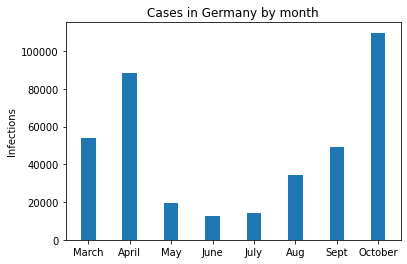

In [ ]:
N = 8
casesmonth = (53863.0, 88212.0, 19721.0, 12854.0, 14208.0, 34383.0, 49101.0, 109711.0)
deathsmonth = (2356.0, 5680.0, 674.0, 140.0, 127.0, 109.0, 267.0, 285.0)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, casesmonth, width)

plt.ylabel('Infections')
plt.title('Cases in Germany by month')
plt.xticks(ind, ('March','April','May', 'June', 'July', 'Aug', 'Sept', 'October'))
plt.yticks()


plt.show()

In [ ]:
import matplotlib
matplotlib.axes.Axes.barh
matplotlib.pyplot.barh
matplotlib.axes.Axes.text
matplotlib.pyplot.text
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend


<function matplotlib.pyplot.legend>

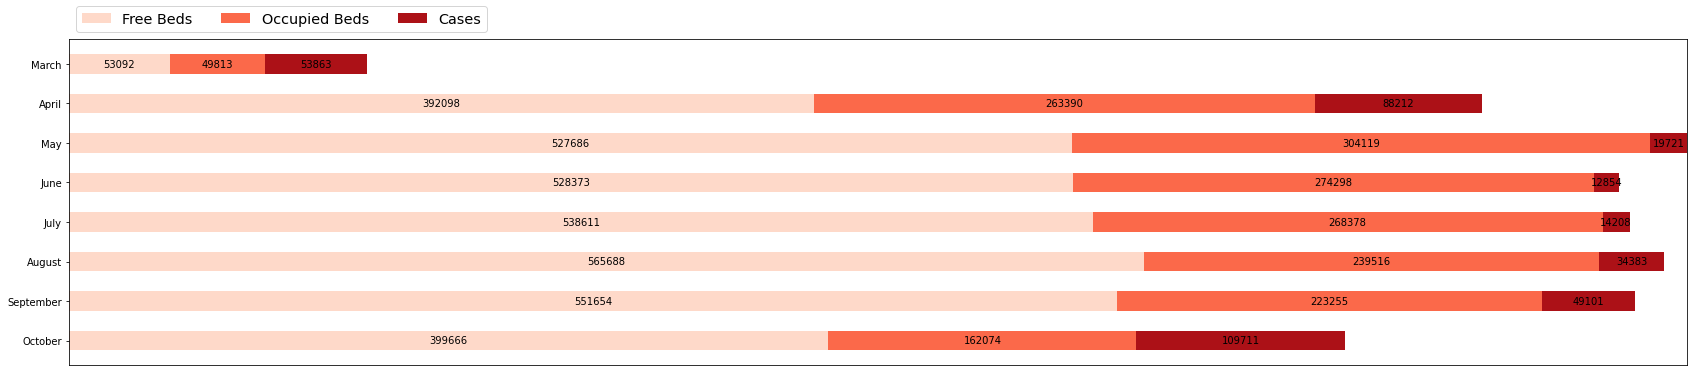

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

casesmonth = (53863.0, 88212.0, 19721.0, 12854.0, 14208.0, 34383.0, 49101.0, 109711.0)
deathsmonth = (2356.0, 5680.0, 674.0, 140.0, 127.0, 109.0, 267.0, 285.0)
freeBedmonth = (53092.0, 392098.0, 527686.0, 528373.0, 538611.0, 565688.0, 551654.0, 399666.0)
occBedmonth = (49813.0, 263390.0, 304119.0, 274298.0, 268378.0, 239516.0, 223255.0, 162074.0)



category_names = ['Free Beds', 'Occupied Beds','Cases']
results = {
    'March': [53092, 49813, 53863.0],
    'April': [392098, 263390, 88212.0],
    'May': [527686, 304119, 19721.0],
    'June': [528373, 274298, 12854.0],
    'July': [538611, 268378, 14208.0],
    'August': [565688, 239516, 34383.0],
    'September': [551654, 223255, 49101.0],
    'October': [399666, 162074, 109711.0]
}

def analise(results, category_names):
   
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Reds')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(29, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        b, g, r, _ = color
        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='x-large')

    return fig, ax

analise(results, category_names)
plt.show()